<a href="https://colab.research.google.com/github/seeedata/BADA/blob/main/%EC%9D%B4%EC%83%81%EC%B9%98%20%ED%83%90%EC%A7%80%20%EA%B8%B0%EB%B0%98%20%EB%8C%80%EC%B6%9C%20%EC%97%B0%EC%B2%B4%EC%9E%90%20%EC%A0%81%EB%B0%9C%20%EC%8B%9C%EC%8A%A4%ED%85%9C/PCA%20%EB%B3%80%EC%88%98%20%EC%84%A0%ED%83%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 처리

## 데이터 불러오기

In [ ]:
raw_df = pd.read_csv('/content/drive/MyDrive/이상치탐지/anomaly_detecting.csv')

In [ ]:
raw_df = raw_df.iloc[:,2:]
raw_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
raw_df.replace('XNA', np.nan, inplace=True)

In [ ]:
raw_df_na = pd.DataFrame(raw_df.isnull().sum(), columns=["Na"])
raw_df_na.to_csv('/content/drive/MyDrive/이상치탐지/이상치_데이터_프레임/결측치.csv')

<Axes: xlabel='Na', ylabel='Count'>

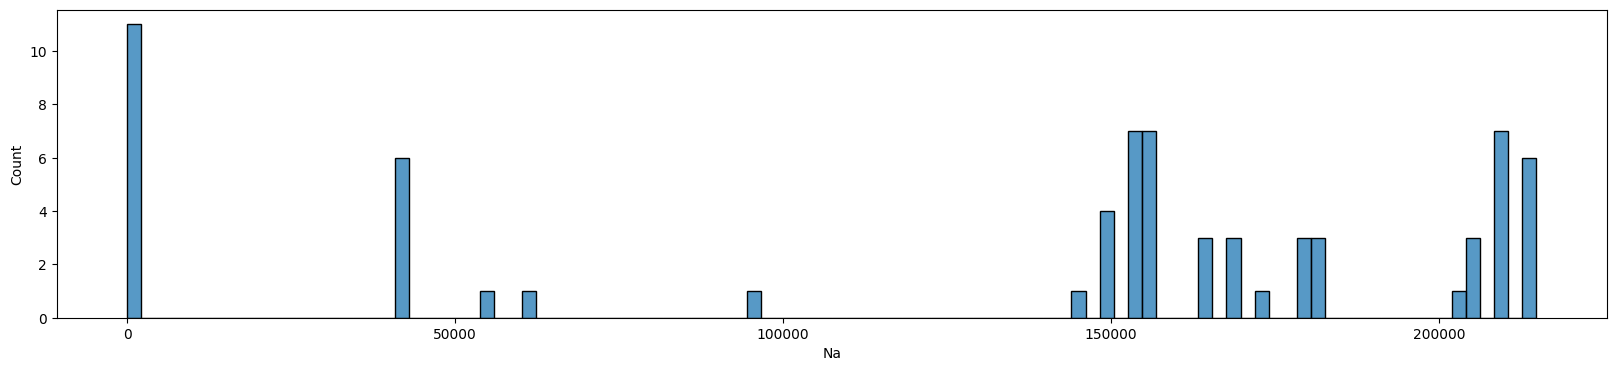

In [ ]:
plt.figure(figsize=(20,4))
sns.histplot(x='Na', data = raw_df_na[raw_df_na['Na'] != 0], bins = 100)

In [ ]:
remove_col = list(raw_df_na[raw_df_na['Na'] >= 10000].index)

In [ ]:
new_df = raw_df.drop(labels=remove_col,axis=1)
new_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,0,0,0,0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,0,0,0,0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = new_df['TARGET']
X = new_df.drop(labels='TARGET',axis=1)

## 데이터 형식 바꾸기 + 결측치 대체

- Categorical 변수

- Numerical 변수

In [ ]:
category_list = list(X.dtypes[X.dtypes == 'object'].index)
numerical_list = list(X.dtypes[X.dtypes == 'int64'].index) + list(X.dtypes[X.dtypes == 'float64'].index)

In [ ]:
X['CODE_GENDER'].replace({'F': 1, 'M': 0}, inplace = True)
X['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0}, inplace = True)
X['FLAG_OWN_REALTY'].replace({'Y': 1, 'N': 0}, inplace = True)
X['NAME_CONTRACT_TYPE'].replace({'Cash loans':1,'Revolving loans':0}, inplace = True)
X['NAME_TYPE_SUITE'].replace({'Unaccompanied':0, 'Family':1, 'Spouse, partner':2, 'Children':3, 'Other_A':4,'Other_B':5, 'Group of people':6}, inplace = True)
X['NAME_INCOME_TYPE'].replace({'Working':0, 'State servant':1, 'Commercial associate':2, 'Pensioner':3, 'Unemployed':4,'Student':5, 'Businessman':6, 'Maternity leave':7}, inplace = True)
X['NAME_EDUCATION_TYPE'].replace({'Secondary / secondary special':0, 'Higher education':1, 'Incomplete higher':2, 'Lower secondary':3, 'Academic degree':4}, inplace = True)
X['NAME_FAMILY_STATUS'].replace({'Single / not married':0, 'Married':1, 'Civil marriage':2, 'Widow':3, 'Separated':4, 'Unknown':5}, inplace = True)
X['NAME_HOUSING_TYPE'].replace({'House / apartment':0, 'Rented apartment':1, 'With parents':2, 'Municipal apartment':3, 'Office apartment':4, 'Co-op apartment':5}, inplace = True)
X['WEEKDAY_APPR_PROCESS_START'].replace({'WEDNESDAY':0, 'MONDAY':1, 'THURSDAY':2, 'SUNDAY':3, 'SATURDAY':4, 'FRIDAY':5, 'TUESDAY':6}, inplace = True)

## 결측치 제거하기

In [ ]:
from sklearn.impute import SimpleImputer

# 평균으로 Imputer 선언
imputer_mean = SimpleImputer(strategy='mean')
imputer_mean.fit(X[numerical_list])

X[numerical_list] = pd.DataFrame(imputer_mean.transform(X[numerical_list]))

In [ ]:
from sklearn.impute import SimpleImputer

# 최빈값으로 Imputer 선언
imputer_mode = SimpleImputer(strategy='most_frequent')
imputer_mode.fit(X[category_list])

X[category_list]  = imputer_mode.transform(X[category_list] )

In [ ]:
X[category_list] = X[category_list].astype('category')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 62 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   NAME_CONTRACT_TYPE           307511 non-null  category
 1   CODE_GENDER                  307511 non-null  category
 2   FLAG_OWN_CAR                 307511 non-null  category
 3   FLAG_OWN_REALTY              307511 non-null  category
 4   CNT_CHILDREN                 307511 non-null  float64 
 5   AMT_INCOME_TOTAL             307511 non-null  float64 
 6   AMT_CREDIT                   307511 non-null  float64 
 7   AMT_ANNUITY                  307511 non-null  float64 
 8   AMT_GOODS_PRICE              307511 non-null  float64 
 9   NAME_TYPE_SUITE              307511 non-null  category
 10  NAME_INCOME_TYPE             307511 non-null  category
 11  NAME_EDUCATION_TYPE          307511 non-null  category
 12  NAME_FAMILY_STATUS           307511 non-null

In [ ]:
(X.isna().sum() != 0).sum() # 결측치 제거 완

0

In [ ]:
# Target 변수 변환

y[y=='.'] = np.nan
y.value_counts()

0    105347
1      9341
0      4880
1       433
Name: TARGET, dtype: int64

In [ ]:
y_train = y[y.index <= 120000]
y_test = y[y.index >= 120001]

In [ ]:
y_train = y_train.astype('int64')
y_train.value_counts()

0    110227
1      9774
Name: TARGET, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 데이터를 정규화하고 스케일 조정
X[numerical_list] = scaler.fit_transform(X[numerical_list])
X

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1.0,0.0,0.0,1.0,0.0,0.001512,0.090287,0.090032,0.077441,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.002089,0.311736,0.132924,0.271605,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.000358,0.022472,0.020025,0.023569,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.000935,0.066837,0.109477,0.063973,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.000819,0.116854,0.078975,0.117845,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.0,0.0,0.0,0.0,0.0,0.001127,0.052360,0.101176,0.046016,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,1.0,1.0,0.0,1.0,0.0,0.000396,0.056067,0.040505,0.046016,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,1.0,1.0,0.0,1.0,0.0,0.001089,0.157969,0.110618,0.135802,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,1.0,1.0,0.0,1.0,0.0,0.001243,0.081175,0.072499,0.069585,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.021950,0.001224,0.138334,0.099423,0.124179,0.284944,0.518151,0.213300,0.797904,0.583965,...,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,0.038006,0.002027,0.100497,0.056525,0.092101,0.191521,0.245997,0.368717,0.142789,0.209733,...,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000742,0.056180,0.058143,0.049383,0.134537,0.312683,0.039545,0.696843,0.402668,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.001039,0.116987,0.090821,0.102132,0.257000,0.534329,0.043583,0.817445,0.547867,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.052632,0.001512,0.190674,0.128624,0.159371,0.392880,0.722435,0.045994,0.918531,0.761012,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train = X[X.index <= 120000]
X_test = X[X.index >= 120001]

In [ ]:
y_train_bool = y_train.astype(bool)
y_train_bool # 연체를 true

0          True
1         False
2         False
3         False
4         False
          ...  
119996    False
119997    False
119998    False
119999    False
120000    False
Name: TARGET, Length: 120001, dtype: bool

In [ ]:
X_train_nodefault = X_train[~y_train_bool]
X_train_default = X_train[y_train_bool]

# PCA

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# PCA 모델 생성 (전체)
pca = PCA()

# 주성분 계산
pca.fit(X)

# 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_

# 누적 설명된 분산 비율 확인
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# 결과 출력
print("설명된 분산 비율:", explained_variance_ratio)
print("누적 설명된 분산 비율:", cumulative_explained_variance_ratio)

설명된 분산 비율: [4.07989396e-01 1.52646566e-01 8.38603229e-02 6.08535165e-02
 4.50254629e-02 3.36738230e-02 2.90417420e-02 2.44746063e-02
 2.12601601e-02 1.98950846e-02 1.69513936e-02 1.36861036e-02
 1.26168281e-02 1.11572569e-02 9.28630638e-03 7.30248602e-03
 7.14031974e-03 6.24571098e-03 4.65902573e-03 4.48028811e-03
 4.26043111e-03 3.31922195e-03 2.74281826e-03 2.64746606e-03
 2.02482013e-03 1.62829128e-03 1.57230885e-03 1.50545901e-03
 1.37322290e-03 1.26765807e-03 9.51846909e-04 8.39742732e-04
 6.90467029e-04 5.30295884e-04 3.33249576e-04 3.02074132e-04
 2.70359897e-04 2.63230803e-04 2.52008230e-04 2.04677045e-04
 1.86450998e-04 1.40306775e-04 1.05075046e-04 9.22495858e-05
 5.19786647e-05 4.29877987e-05 3.31608814e-05 2.90051059e-05
 2.31472748e-05 1.68835715e-05 1.66716917e-05 9.66798151e-06
 7.37057809e-06 7.05675427e-06 3.67020245e-06 2.81172479e-06
 2.28144674e-06 1.98127653e-06 5.66280962e-07 3.37945526e-07
 2.83027591e-07 6.24217920e-09]
누적 설명된 분산 비율: [0.4079894  0.56063596 0.644

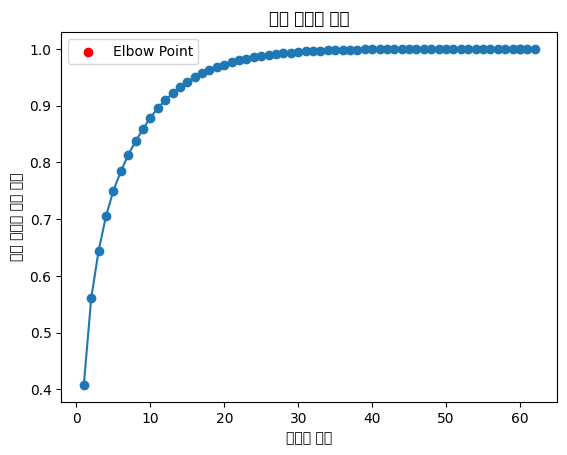

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 누적 설명된 분산 비율
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# 엘보 포인트 찾기
def find_elbow_point(cumulative_explained_variance_ratio):
    # 2차 미분을 사용하여 급격한 증가 구간 찾기
    second_derivative = np.diff(np.diff(cumulative_explained_variance_ratio))
    elbow_point_index = np.argmax(second_derivative) + 1  # 1을 더하는 이유: 두 번 미분으로 인해 인덱스가 하나 줄어든다.
    return elbow_point_index

elbow_point_index = find_elbow_point(cumulative_explained_variance_ratio)

# 엘보 포인트 시각화
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.scatter(elbow_point_index + 1, cumulative_explained_variance_ratio[elbow_point_index], color='red', label='Elbow Point')
plt.xlabel('주성분 개수')
plt.ylabel('누적 설명된 분산 비율')
plt.title('엘보 포인트 찾기')
plt.legend()
plt.show()

In [ ]:
(cumulative_explained_variance_ratio <= 0.96).sum() # n 개수 17

17

In [ ]:
# PCA 모델 생성 (전체)
pca = PCA(n_components = 17)

# 주성분 계산
pca.fit(X)

# 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_

In [ ]:
explained_variance_ratio

array([0.4079894 , 0.15264657, 0.08386032, 0.06085352, 0.04502546,
       0.03367382, 0.02904174, 0.02447461, 0.02126016, 0.01989508,
       0.01695139, 0.0136861 , 0.01261683, 0.01115726, 0.00928631,
       0.00730249, 0.00714032])

In [ ]:
data = X.copy()

In [ ]:
top_list = []

for i in range(17):
    pca = PCA(n_components=  17-i+1)  # 주성분 개수를 조절
    pca.fit(data)
    new_explained_variance_ratio = pca.explained_variance_ratio_

    index_of_highest_variance = np.argmax(new_explained_variance_ratio)
    column_with_highest_variance = data.columns[np.abs(pca.components_[index_of_highest_variance]).argmax()]
    top_list.append(column_with_highest_variance)

In [ ]:
top_df = pd.DataFrame({'Columns':top_list, "설명된_분산비율 ": explained_variance_ratio})

In [ ]:
top_df.to_csv('/content/drive/MyDrive/이상치탐지/이상치_데이터_프레임/선택변수.csv')